# Crime Analysis of Seattle Neighborhoods
@infoxiao

March 2021

## Load package and raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import datetime

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_path = 'data/'
# SPD Crime Data: 2008-Present
# Accessed March 14, 2021
# https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5
crime_dataset = 'SPD_Crime_Data__2008-Present.csv'

# City Annual Stats
# https://data.seattle.gov/dataset/City-Annual-Stats/4as8-nphm
annual_stats_dataset = 'City_Annual_Stats.csv'

# An Urban Village Demographic Area Profile ACS 5-year 2013-2017
# https://data.seattle.gov/dataset/An-Urban-Village-Demographic-Area-Profile-ACS-5-ye/6zth-dtbf
population_dataset_2017 = 'An_Urban_Village_Demographic_Area_Profile_ACS_5-year_2013-2017.csv'

# Urban Village Demographic Area Profile ACS 5-year 2009-2013
# https://data.seattle.gov/dataset/Urban-Village-Demographic-Area-Profile-ACS-5-year-/napx-9dfy
population_dataset_2013 = 'Urban_Village_Demographic_Area_Profile_ACS_5-year_2009-2013.csv'


In [3]:
dfc = pd.read_csv(data_path + crime_dataset)
dfs = pd.read_csv(data_path + annual_stats_dataset)
dfp17 = pd.read_csv(data_path + population_dataset_2017)
dfp13 = pd.read_csv(data_path + population_dataset_2013)

len(dfc), len(dfs), len(dfp17), len(dfp13)

(892364, 23, 31, 31)

## City Annual Stats

In [4]:
# remove weird years: 1995 and years with na data

dfs = dfs[(dfs.Year_ !=2035) & 
          (dfs.Year_ !=1995) & 
          (dfs.Year_ !=2020)].reset_index(drop=True)

len(dfs)

20

In [5]:
dfs.head()

,OBJECTID,City,Year_,Const_Res,FIRE,Manufacturing,Retail,Services,WTU,Government,...,Households,Year_Display,HU_CH_NUMB,HU_CH_PERC,POP_CH_NUMB,POP_CH_PERC,HH_CH_NUMB,HH_CH_PERC,JOB_CH_NUMB,JOB_CH_PERC
0,2,Seattle,2000,22645.0,42471.0,37104.0,41984.0,235336.0,43636.0,47565.0,...,258499.0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Seattle,2001,21601.0,41671.0,35044.0,42232.0,234726.0,42056.0,48104.0,...,259691.0,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Seattle,2002,19582.0,40710.0,31094.0,38534.0,219499.0,37943.0,47518.0,...,261767.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Seattle,2003,17831.0,41005.0,28425.0,37179.0,217129.0,39494.0,48424.0,...,263791.0,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Seattle,2004,18157.0,40063.0,28343.0,36347.0,217684.0,36263.0,46741.0,...,264155.0,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# calculate yoy growth up to 2019
dfs['Total_Population_pct_change'] = dfs['Total_Population'].pct_change()
dfs['Housing_Units_pct_change'] = dfs['Housing_Units'].pct_change()
dfs['Total_Jobs_pct_change'] = dfs['Total_Jobs'].pct_change()

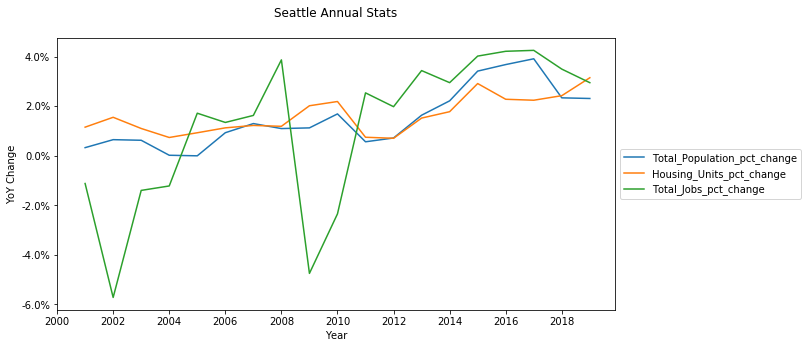

In [7]:
# plot overall stats growth
plt.rcParams["figure.figsize"] = (10,5)
ax = dfs.plot(x='Year_Display', y=[
    'Total_Population_pct_change', 'Housing_Units_pct_change', 'Total_Jobs_pct_change'], kind="line")
plt.xticks(np.arange(2000, 2020, step=2))
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('YoY Change')
plt.xlabel('Year')
plt.title('Seattle Annual Stats\n')
sns.set_context("paper", font_scale=2)    

In [8]:
# dfs[['Year_Display', 'Housing_Units_pct_change']]

In [9]:
# Total population from 2013 to 2019 grew by 20%
dfs.loc[dfs['Year_Display'] == 2019].Total_Population.item() \
/ dfs.loc[dfs['Year_Display'] == 2013].Total_Population.item()

1.1926268751994893

In [10]:
# Housing units grew by 16% in the same time period
# (not much lower than population growth than I imagined actually)
dfs.loc[dfs['Year_Display'] == 2019].Housing_Units.item() \
/ dfs.loc[dfs['Year_Display'] == 2013].Housing_Units.item()

1.1573942376678792

### Population by Neighborhood

In [11]:
pcols = ['UV_AREA', 'TOTAL_POPULATION', 'MEDIAN_AGE']

In [12]:
dfp = dfp17[pcols].merge(dfp13[pcols], 
                         on='UV_AREA', 
                         suffixes=('_17', '_13'))

In [13]:
dfp.head()

,UV_AREA,TOTAL_POPULATION_17,MEDIAN_AGE_17,TOTAL_POPULATION_13,MEDIAN_AGE_13
0,Queen Anne,10637,36.5,10145,36.6
1,Ballard,24140,35.4,21236,36.0
2,Morgan Junction,12928,36.9,11391,34.7
3,Outside - Northwest,12057,47.3,11860,44.9
4,First Hill - Capitol Hill,36520,32.3,32527,32.5


In [14]:
dfp['TOTAL_POPULATION_GROWTH_17_13'] = \
    dfp.TOTAL_POPULATION_17 / dfp.TOTAL_POPULATION_13 - 1
dfp = dfp.sort_values(by='TOTAL_POPULATION_GROWTH_17_13')

Text(0, 0.5, 'Neighborhood')

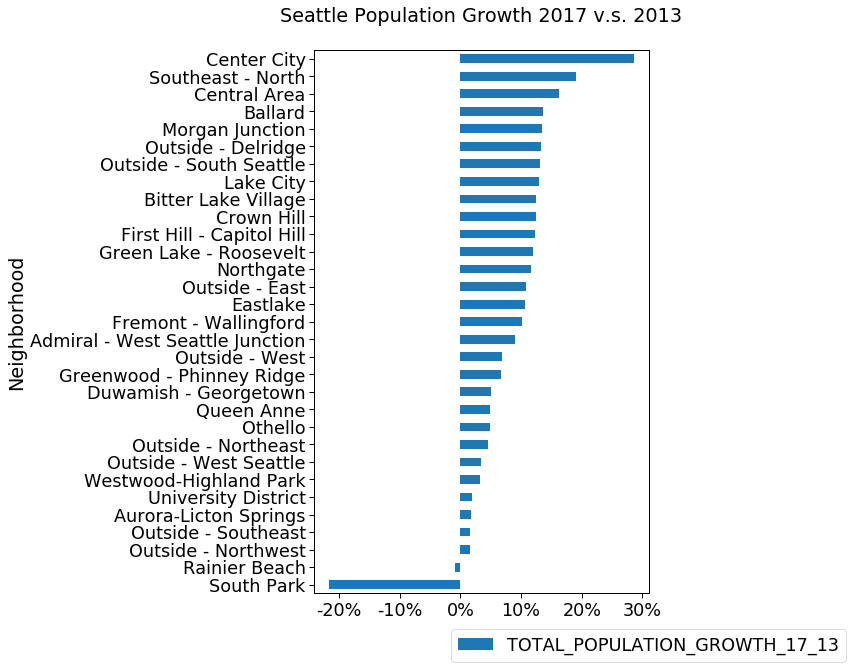

In [15]:
plt.rcParams["figure.figsize"] = (6,10)
ax = dfp.plot(x='UV_AREA', y=[
    'TOTAL_POPULATION_GROWTH_17_13'], kind='barh')
ax.legend(loc='upper center', bbox_to_anchor=(1, -0.05))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Seattle Population Growth 2017 v.s. 2013\n')
plt.ylabel('Neighborhood')

In [16]:
dfp['MEDIAN_AGE_17_13'] = \
    dfp.MEDIAN_AGE_17 - dfp.MEDIAN_AGE_13
dfp = dfp.sort_values(by='MEDIAN_AGE_17_13', ascending=False)

Text(0, 0.5, 'Neighborhood')

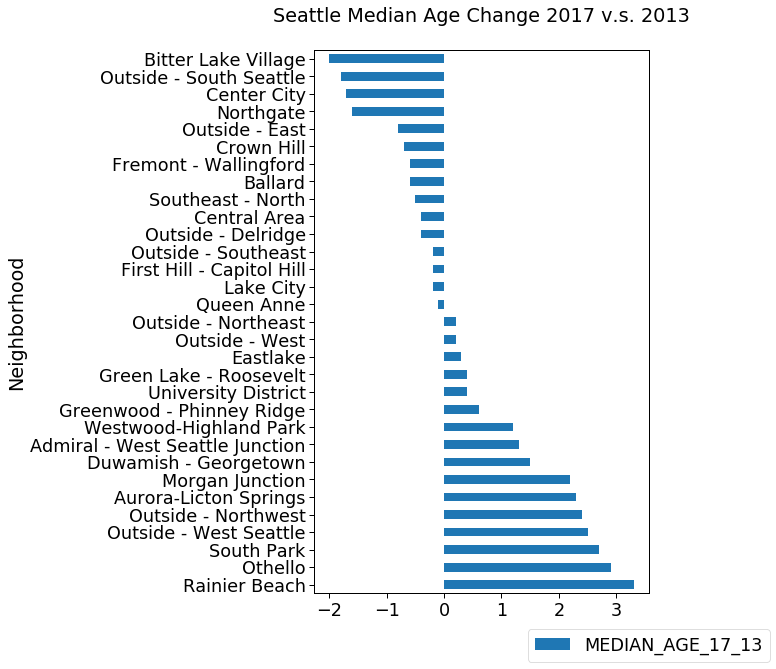

In [17]:
plt.rcParams["figure.figsize"] = (6,10)
ax = dfp.plot(x='UV_AREA', y=[
    'MEDIAN_AGE_17_13'], kind='barh')
ax.legend(loc='upper center', bbox_to_anchor=(1, -0.05))
plt.title('Seattle Median Age Change 2017 v.s. 2013\n')
plt.ylabel('Neighborhood')

## Crime Rate Analysis

### Overall Count

In [18]:
len(dfc)

892364

In [19]:
## correct a typo in the official dataset
#  "DOWNTOWN COMMERICAL" -> "DOWNTOWN COMMERCIAL"
dfc.replace(to_replace='DOWNTOWN COMMERICAL', value='DOWNTOWN COMMERCIAL', inplace=True)

In [20]:
len(dfc[dfc.MCPP == 'DOWNTOWN COMMERCIAL'])

75580

In [21]:
# dfp.UV_AREA
# dfc.MCPP.value_counts()

In [22]:
date_time_format = '%m/%d/%Y %H:%M:%S %p'

In [23]:
# missing offense start time
dfc['Offense Start DateTime'].isnull().sum()

722

In [24]:
dfc = dfc[~dfc['Offense Start DateTime'].isnull()].reset_index(drop=True)

In [25]:
# throw out 'FRAUD OFFENSES', which has weird reporting time spikes
len(dfc[dfc['Offense Parent Group'] == 'FRAUD OFFENSES'])/len(dfc)

0.060286527552537904

In [26]:
dfc = dfc[dfc['Offense Parent Group'] != 'FRAUD OFFENSES'].reset_index(drop=True)

In [27]:
dfc['time'] = dfc['Report DateTime'].apply(
    lambda x : datetime.datetime.strptime(str(x), date_time_format))

In [28]:
dfc['year'] = dfc.time.apply(lambda x: x.year)

In [29]:
dfc['date'] = dfc.time.apply(lambda x: str(x.date()))

In [30]:
dfc['month'] = dfc.time.apply(lambda x: str(x.date())[:-3])

In [31]:
dfc.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,time,year,date,month
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020-02-05 11:24:31,2020,2020-02-05,2020-02
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-05 10:06:28,2020,2020-02-05,2020-02
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-05 09:39:33,2020,2020-02-05,2020-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05 03:30:55,2020,2020-02-05,2020-02
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020-02-05 12:51:31,2020,2020-02-05,2020-02


In [32]:
dfc[dfc.year==2021].month.value_counts()
# exclude March data because the month is not complete
dfc = dfc[dfc.month != '2021-03'].reset_index(drop=True)
dfc = dfc[dfc['Crime Against Category'] != 'NOT_A_CRIME'].reset_index(drop=True)

In [33]:
dfc_flat = dfc.groupby('Crime Against Category').month.value_counts().unstack().T.reset_index().set_index('month').stack().reset_index()
dfc_flat = dfc_flat.rename(columns={0: 'crime_count'})

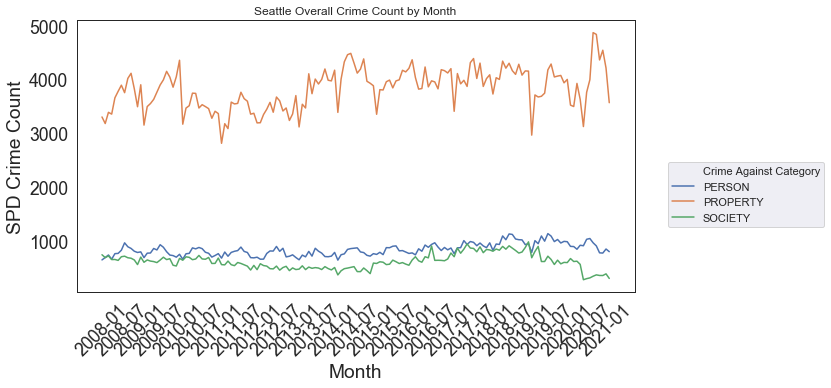

In [34]:
plt.figure(figsize=(10,5))
sns.set_style("white")
plt.xticks(rotation=45)
sns.set(font_scale = 1)
plot_= sns.lineplot(data=dfc_flat, x='month', y='crime_count', hue='Crime Against Category')
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 6 == 0:  # every x label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel('Month')        
plt.ylabel('SPD Crime Count')
plt.title('Seattle Overall Crime Count by Month')
plot_.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

In [35]:
# stack and flatten dataframe for crime count per month per neighborhood
dfcn = dfc.groupby(['MCPP', 'Crime Against Category']).month.value_counts(
    ).unstack().reset_index()
dfcn = dfcn.fillna(0)
dfcn = dfcn.set_index(
    ['MCPP', 'Crime Against Category']).stack().reset_index()
dfcn = dfcn.rename(columns={0: 'crime_count'})
dfcn = dfcn[~dfcn.crime_count.isnull()].reset_index(drop=True)

[]

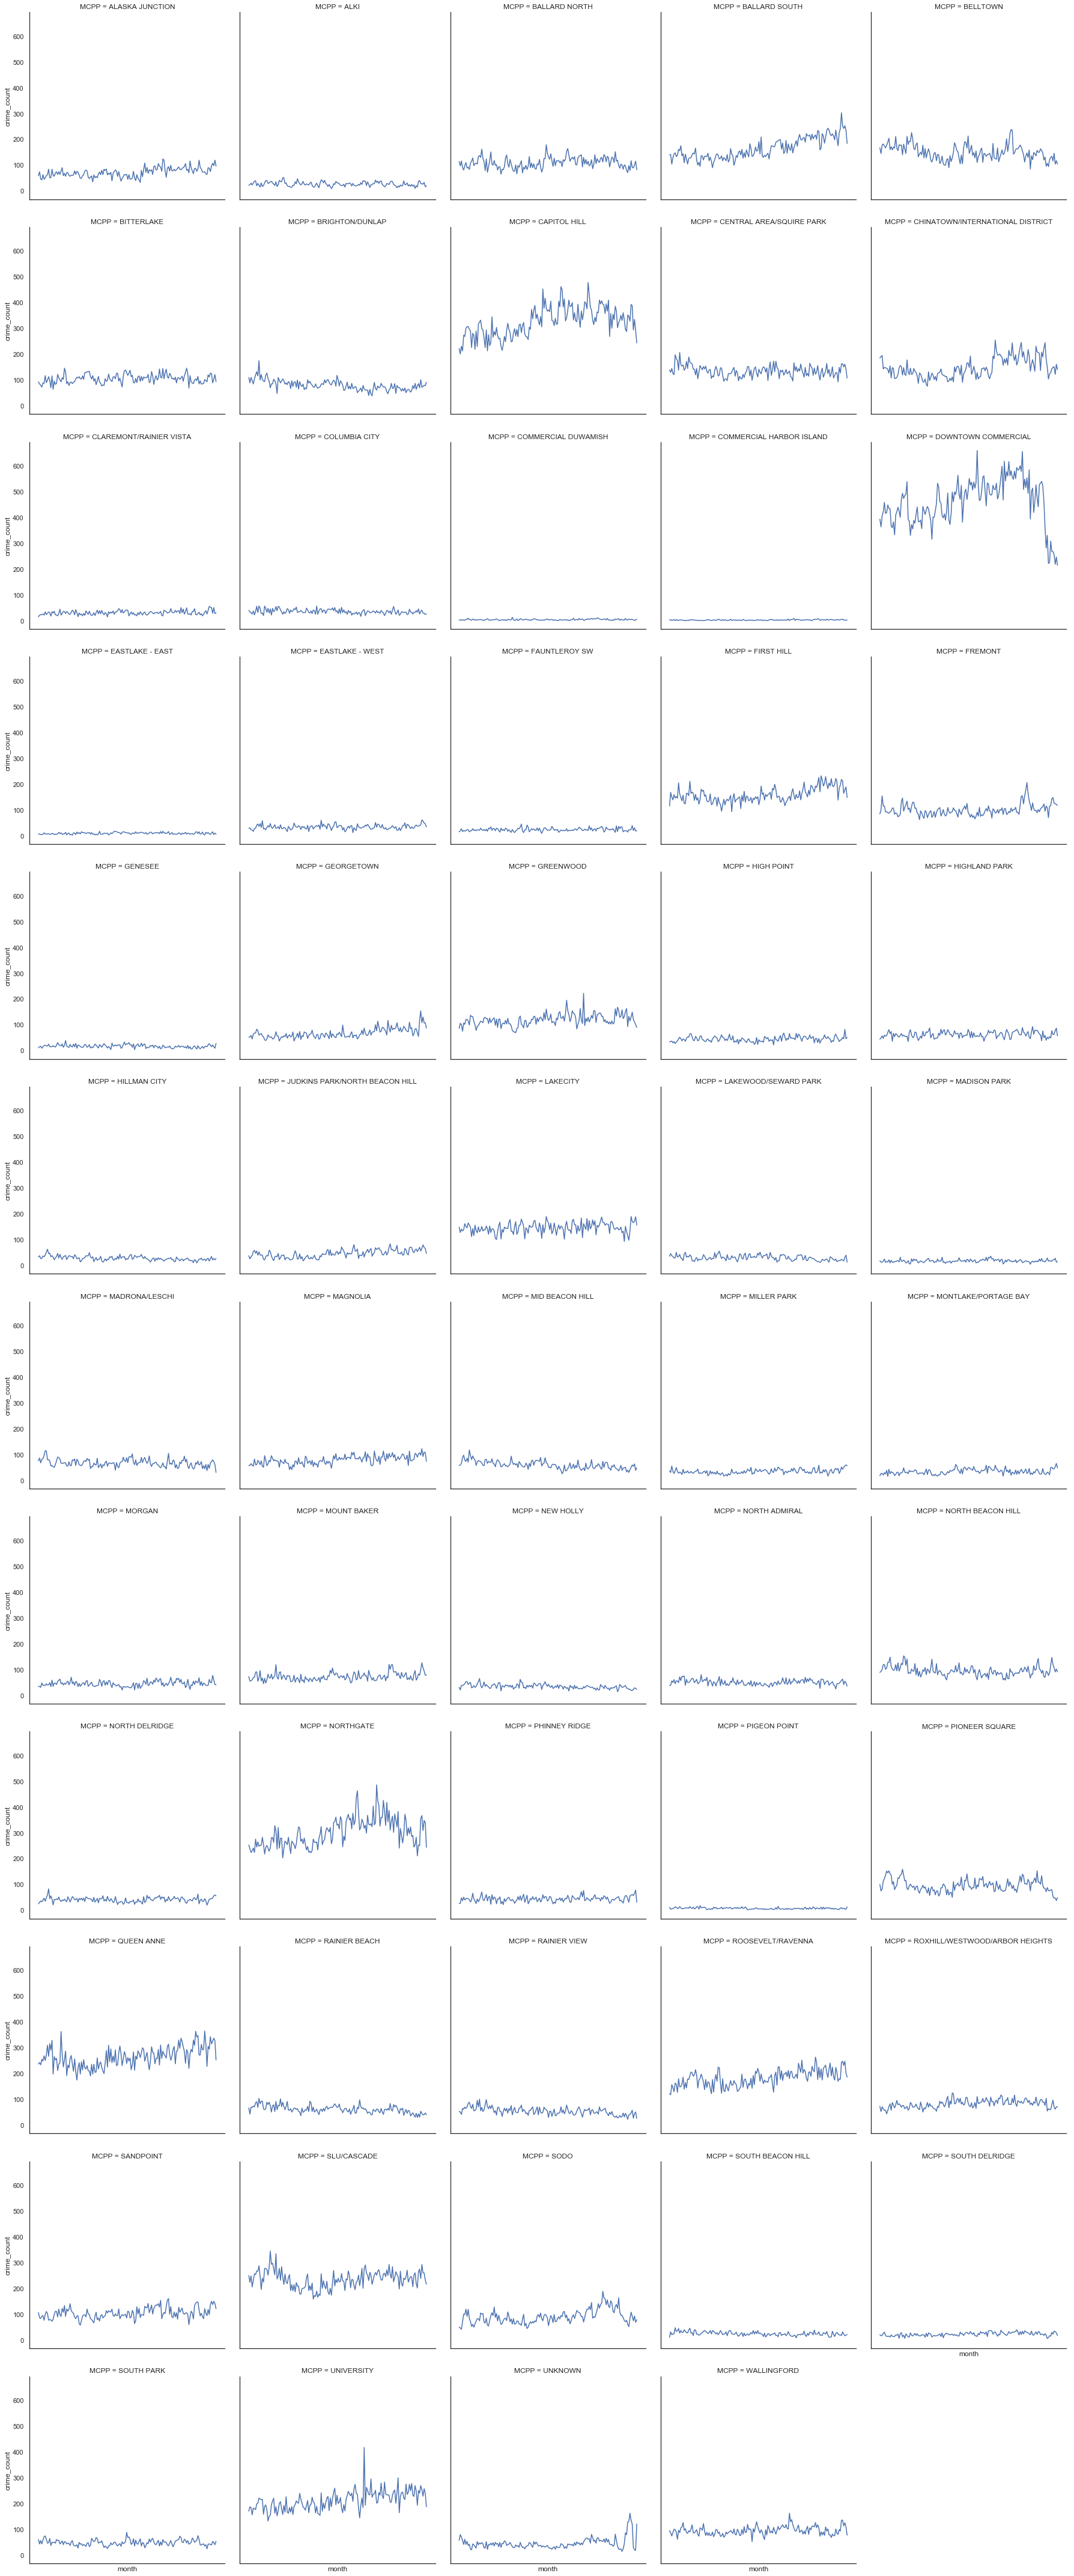

In [36]:
# plot total crime by neighborhood
sns.set_style('white')
g = sns.FacetGrid(dfcn.groupby(['month','MCPP']).crime_count.sum().unstack().reset_index().set_index('month').stack().reset_index().rename(columns={0: 'crime_count'}), col="MCPP", col_wrap=5, height=5)
g = g.map_dataframe(sns.lineplot, "month", "crime_count")
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])

[]

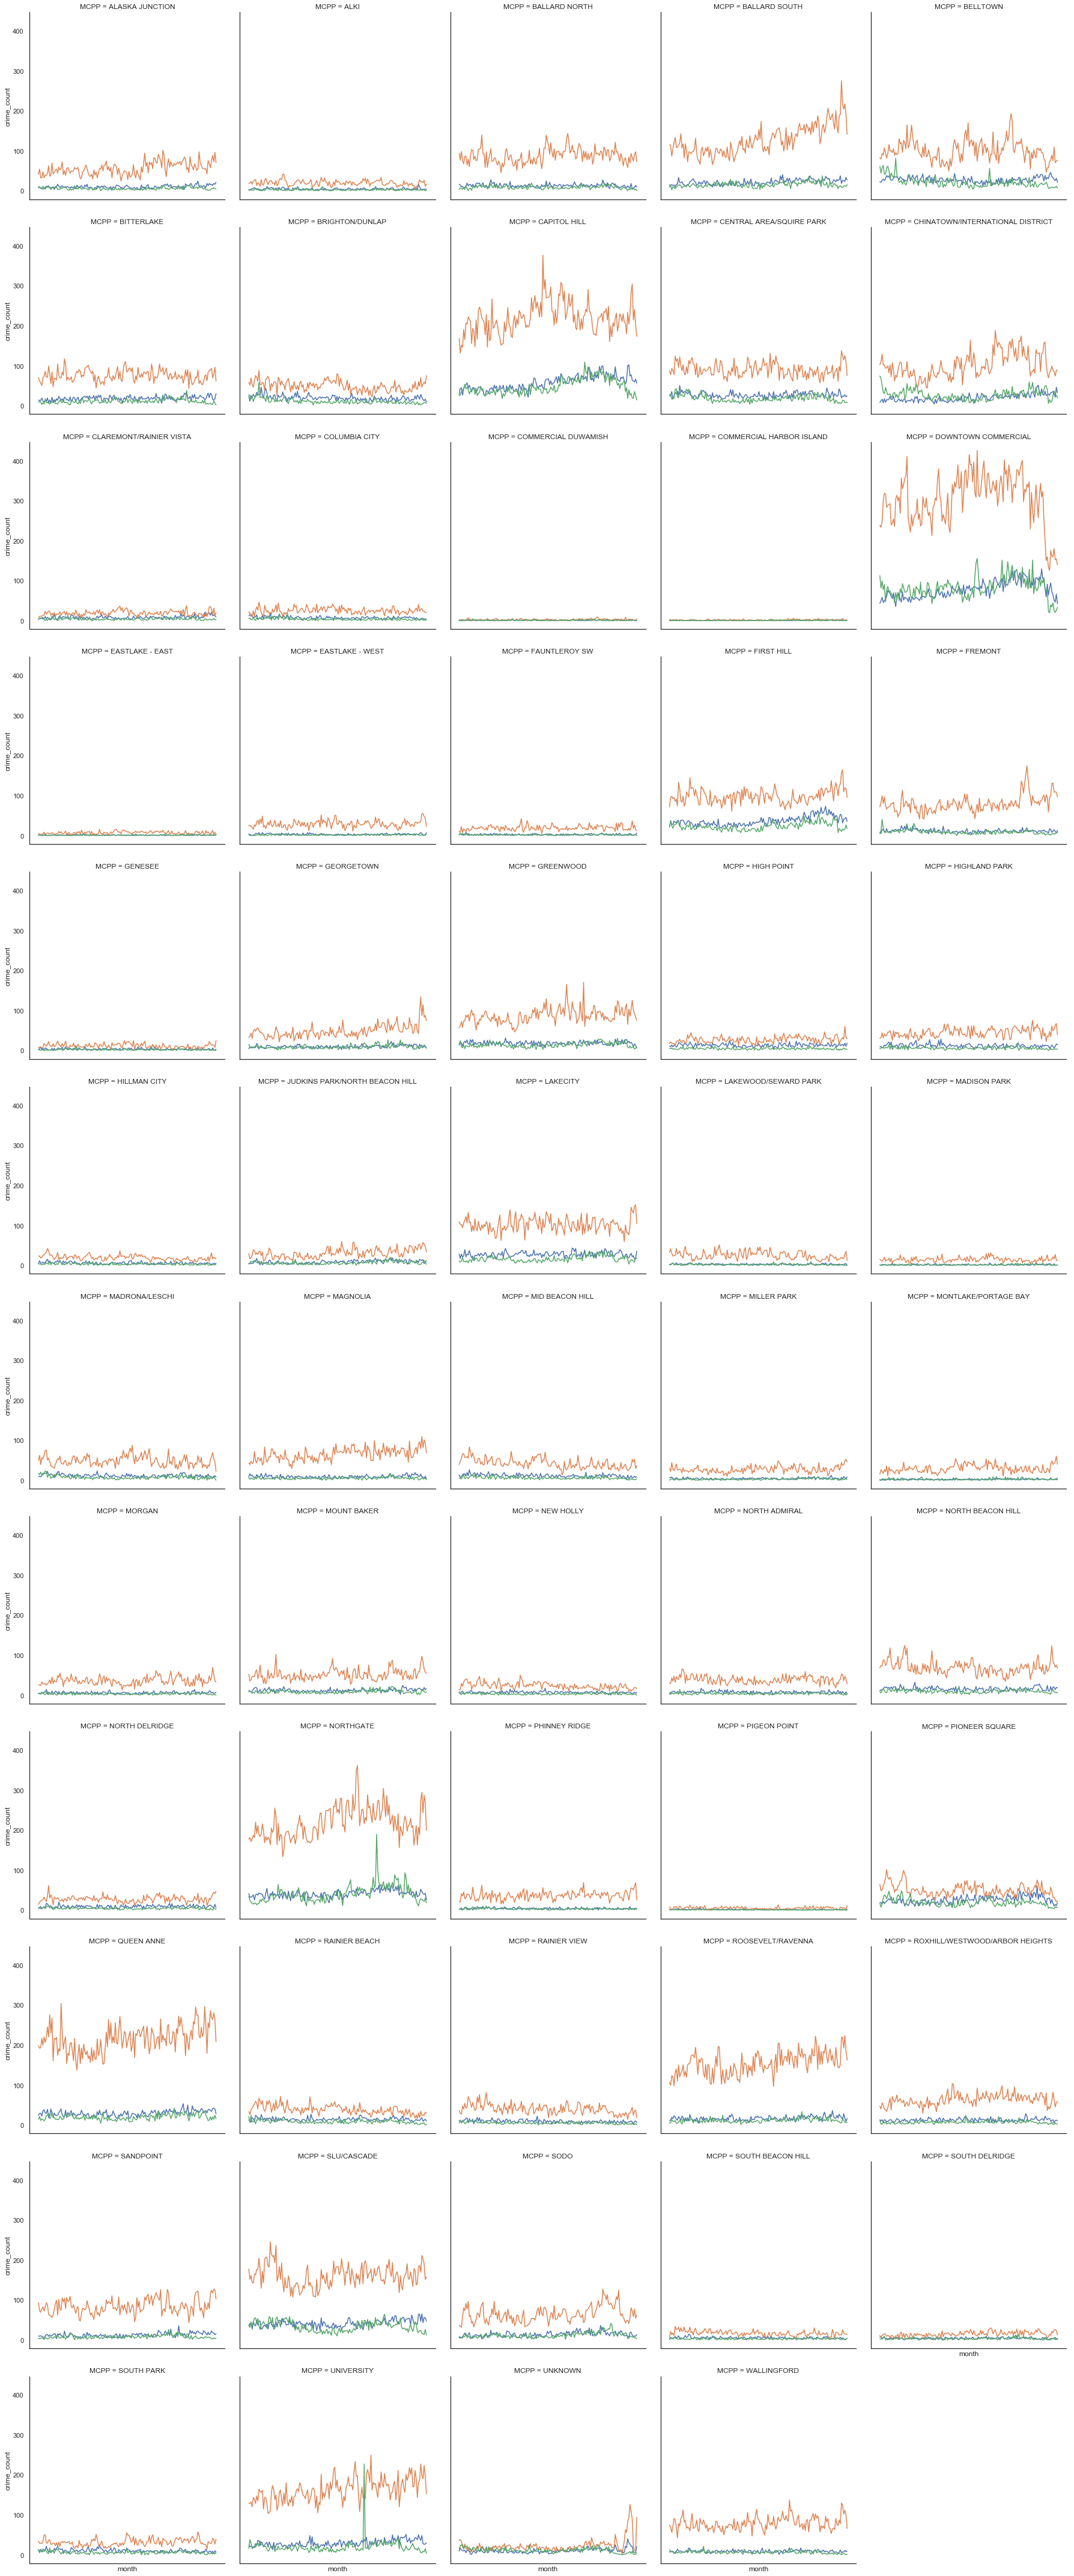

In [37]:
# plot crime by type by neighborhood
sns.set_style('white')
g = sns.FacetGrid(dfcn, col="MCPP", col_wrap=5, height=5)
g = g.map_dataframe(sns.lineplot, "month", "crime_count", hue='Crime Against Category')
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])

### Neighborhood Deep Dives

TODO

In [38]:
qa = dfc[dfc.MCPP == 'BALLARD NORTH']
len(qa)

17055

In [39]:
qa[qa.year == 2020].month.value_counts()[:40]

2020-09    116
2020-03    100
2020-12    100
2020-01     99
2020-07     97
2020-04     96
2020-10     90
2020-11     88
2020-02     83
2020-08     78
2020-05     78
2020-06     70
Name: month, dtype: int64

In [40]:
qa[qa.month == '2020-04']['Offense Parent Group'].value_counts()

LARCENY-THEFT                               42
BURGLARY/BREAKING&ENTERING                  20
MOTOR VEHICLE THEFT                         14
ASSAULT OFFENSES                             9
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY     6
TRESPASS OF REAL PROPERTY                    3
DRUG/NARCOTIC OFFENSES                       1
DRIVING UNDER THE INFLUENCE                  1
Name: Offense Parent Group, dtype: int64

In [41]:
qa[qa.month == '2020-05']['Offense Parent Group'].value_counts()

LARCENY-THEFT                               38
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    10
BURGLARY/BREAKING&ENTERING                  10
MOTOR VEHICLE THEFT                          8
ASSAULT OFFENSES                             7
LIQUOR LAW VIOLATIONS                        1
DRUG/NARCOTIC OFFENSES                       1
ROBBERY                                      1
TRESPASS OF REAL PROPERTY                    1
DRIVING UNDER THE INFLUENCE                  1
Name: Offense Parent Group, dtype: int64

In [42]:
qa[qa.month == '2020-05'][qa[qa.month == '2020-05']['Offense Parent Group'] == 'FRAUD OFFENSES']

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,time,year,date,month


In [43]:
def plot_trend(neighorhood):
    tmp = dfc[dfc.MCPP == neighorhood].reset_index(drop=True)
    print(len(tmp))
    plt.figure(figsize=(8,6))    
    tmp.groupby('year').year.count().plot(kind="bar")
    plt.show()
    
    plt.figure(figsize=(10,10))    
    tmp_recent = tmp
    (tmp_recent.groupby('year')['Crime Against Category'].value_counts(normalize=True)).plot(kind="barh")
    plt.show()
    (tmp_recent.groupby('year')['Offense Parent Group'].value_counts(normalize=True)).plot(kind="barh")
    plt.show()

## COVID

In [44]:
dfc_covid = dfc[dfc.year >= 2019].reset_index(drop=True)
dfc_covid_flat = dfc_covid.groupby('Crime Against Category').month.value_counts().unstack().T.reset_index().set_index('month').stack().reset_index()
dfc_covid_flat = dfc_covid_flat.rename(columns={0: 'crime_count'})
dfc_covid_flat.sort_values(by=['month', 'Crime Against Category'])
dfc_covid_flat['year'] = dfc_covid_flat.month.apply(lambda x : int(x.split('-')[0]))
dfc_covid_flat['cal_month'] = dfc_covid_flat.month.apply(lambda x : int(x.split('-')[1]))
dfc_covid_flat = dfc_covid_flat.set_index('month')
dfc_covid_flat

,Crime Against Category,crime_count,year,cal_month
month,,,,
2019-01,PERSON,951,2019,1
2019-01,PROPERTY,4155,2019,1
2019-01,SOCIETY,985,2019,1
2019-02,PERSON,788,2019,2
2019-02,PROPERTY,2967,2019,2
...,...,...,...,...
2021-01,PROPERTY,4212,2021,1
2021-01,SOCIETY,391,2021,1
2021-02,PERSON,803,2021,2


In [45]:
dfc_covid_flat['YoY'] = (dfc_covid_flat.crime_count/dfc_covid_flat.shift(12*3).crime_count) - 1

In [46]:
dfc_covid_flat = dfc_covid_flat.reset_index()

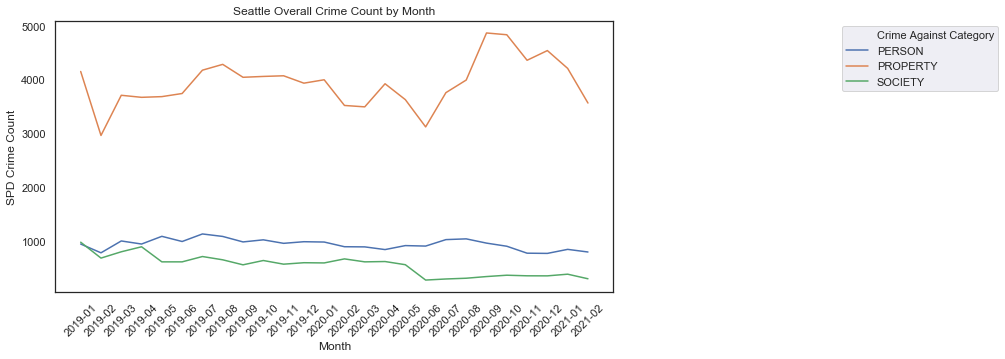

In [47]:
plt.figure(figsize=(10,5))
sns.set_style("white")
plt.xticks(rotation=45)
sns.set(font_scale = 1)
plot_= sns.lineplot(data=dfc_covid_flat, x='month', y='crime_count', hue='Crime Against Category')
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 1 == 0:  # every x label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel('Month')        
plt.ylabel('SPD Crime Count')
plt.title('Seattle Overall Crime Count by Month')
plot_.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

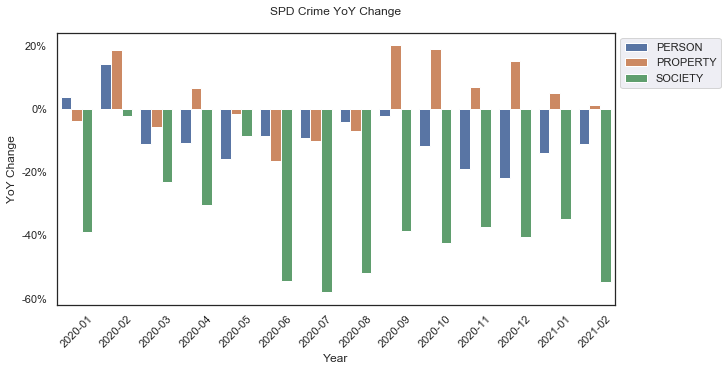

In [48]:
plt.figure(figsize=(10,5))
sns.set_style("white")
plt.xticks(rotation=45)
sns.set(font_scale = 1)
plot_= sns.barplot(data=dfc_covid_flat[dfc_covid_flat.year > 2019], x='month', y='YoY', hue='Crime Against Category')
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 1 == 0:  # every x label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel('Month')        
plt.ylabel('SPD Crime Count')
plt.title('Seattle Overall Crime Count by Month')
plot_.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plot_.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('YoY Change')
plt.xlabel('Year')
plt.title('SPD Crime YoY Change\n')
sns.set_context("paper", font_scale=2)  

In [49]:
dfc_covid_flat[dfc_covid_flat.cal_month == 2]

,month,Crime Against Category,crime_count,year,cal_month,YoY
3,2019-02,PERSON,788,2019,2,NaN
4,2019-02,PROPERTY,2967,2019,2,NaN
5,2019-02,SOCIETY,690,2019,2,NaN
39,2020-02,PERSON,901,2020,2,0.143401
40,2020-02,PROPERTY,3524,2020,2,0.187732
41,2020-02,SOCIETY,675,2020,2,-0.021739
75,2021-02,PERSON,803,2021,2,-0.108768
76,2021-02,PROPERTY,3569,2021,2,0.012770
77,2021-02,SOCIETY,306,2021,2,-0.546667
